ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

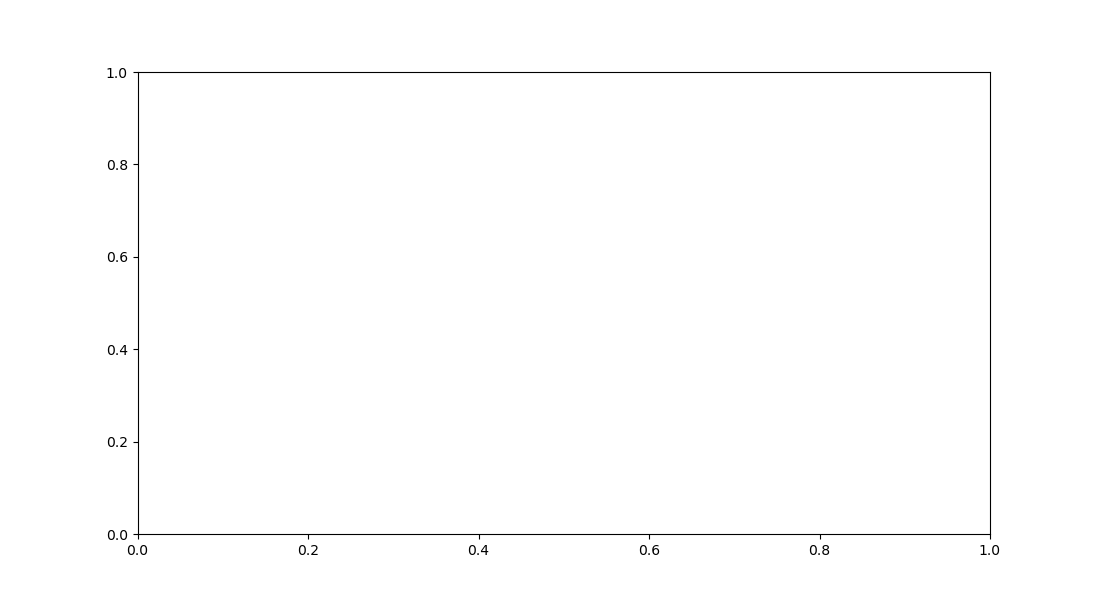

In [1]:
# mc_std_normal.ipynb

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from numba import float64, vectorize


@vectorize([float64(float64)], nopython=True)
def f(x):
    return 1.0 / np.sqrt(2.0 * np.pi) * np.exp(-np.power(x, 2) / 2.0)


@vectorize([float64(float64, float64)], nopython=True)
def halton(n, p):
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_std_normal(ax):
    iterations_sqrt = 160
    iterations = iterations_sqrt**2 #25,600 dots

    primes = [2, 3] #halton primes list

    x = halton(np.arange(iterations), primes[0]) * 2.0 - 1.0 #x going from -1 to 1
    y = halton(np.arange(iterations), primes[1]) * 0.5 #fall between 0 and 0.5

    d = f(x) - y #if positive, then point is within curve

    x_in = x[d >= 0.0]
    y_in = y[d >= 0.0]

    x_out = x[d < 0.0]
    y_out = y[d < 0.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size) #scatter plot, red inside
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    act_x = np.linspace(-4, 4, 100) #100 domains will ensure a smooth curve
    act_y = f(act_x)
    ax.plot(act_x, act_y, color="green")

    est_area = np.count_nonzero(d >= 0.0) / iterations

    act_area = 0.682689492

    err = (est_area - act_area) / act_area

    ax.set_title("Standard Normal Area via Monte Carlo Estimation (Halton QRNG)")
    ax.set_xlim(-4.0, 4.0)
    ax.set_ylim(-0.1, 0.6)
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")

    ax.text(1.5, 0.3, "Total dots\nAct. Area\n" "Est. Area\n% Rel Err", ha="left")

    ax.text(
        2.2,
        0.3,
        f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
    )


def main():
    plt.close("all")
    fig = plt.figure(label=" ")
    fig.set_size_inches(11, 6)
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])
    plot_std_normal(ax)

    plt.show()


main()